In [38]:
#importing all the important libraries that we are going to use

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from scipy.optimize import minimize

In [62]:
# ask user to input tickers

tickers=['AXP','AIG','AMT','AMP','AME']

# write down the end date

end_date=datetime.today()

# set the start date to 8 years ago

start_date=end_date - timedelta(days=8*365) 

# creating an empty dataframe

new_df= pd.DataFrame()


In [43]:
# downloading the adjusting closing prices for each ticker

for ticker in tickers:
    data=yf.download(ticker,start=start_date,end=end_date)
    new_df[ticker]=data['Adj Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [44]:
# displaying our dataframe

print(new_df)

                   AXP        AIG         AMT         AMP         AME
Date                                                                 
2016-02-22   49.342537  42.307747   74.744499   70.546196   43.693436
2016-02-23   48.881298  41.463219   73.722672   69.619911   43.134602
2016-02-24   48.464424  41.349533   74.568611   69.619911   42.983044
2016-02-25   49.129650  41.714966   74.895264   70.404327   43.939690
2016-02-26   49.120777  41.487579   75.389427   72.173409   44.204906
...                ...        ...         ...         ...         ...
2024-02-12  212.259995  69.730003  191.770004  397.369995  168.419998
2024-02-13  209.669998  70.089996  188.419998  389.890015  168.039993
2024-02-14  210.899994  69.169998  188.490005  391.359985  173.410004
2024-02-15  212.529999  70.300003  189.460007  397.829987  173.740005
2024-02-16  212.559998  70.040001  187.130005  397.799988  173.889999

[2012 rows x 5 columns]


In [64]:
# Calculating the log returns for each ticker

y= np.log(new_df/new_df.shift(1))

# dropping the null values from log return

log_return=y.dropna()

# Calculating The Covariance Matrix

cov_matrix=log_return.cov()*252

# displaying the covariance matrix
print(cov_matrix)

          AXP       AIG       AMT       AMP       AME
AXP  0.102388  0.078450  0.029399  0.085944  0.051414
AIG  0.078450  0.120325  0.026442  0.090600  0.053402
AMT  0.029399  0.026442  0.067859  0.036818  0.027620
AMP  0.085944  0.090600  0.036818  0.127466  0.066043
AME  0.051414  0.053402  0.027620  0.066043  0.062022


In [66]:
# Calculating the Optimal Portfolio Metrics

def sta_dev (weights,cov_matrix):
    var=weights.T @ covar_matrix @ weights
    return np.sqrt(var)  

def expected_return(weights, log_return):
    return np.sum(log_return.mean()*weights)*252

def sharpe_ratio(weights, log_return, cov_matrix, risk_free_rate):
    return (expected_return(weights, log_return) - risk_free_rate) / sta_dev(weights, cov_matrix)

risk_free_rate = 0.0386

def neg_sharpe_ratio(weights, log_return, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_return, cov_matrix, risk_free_rate)

constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.4) for _ in range(len(tickers))]

initial_weights = np.array([1/len(tickers)]*len(tickers))

optimized_results = minimize(neg_sharpe_ratio, initial_weights, args=(log_return, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)


In [67]:
# Analyze the optimal Portfolio

optimal_weights = optimized_results.x

print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expected_return(optimal_weights, log_return)
optimal_portfolio_volatility = sta_dev(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_return, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
AXP: 0.1842
AIG: 0.0000
AMT: 0.1506
AMP: 0.2652
AME: 0.4000
Expected Annual Return: 0.1777
Expected Volatility: 0.2486
Sharpe Ratio: 0.5598


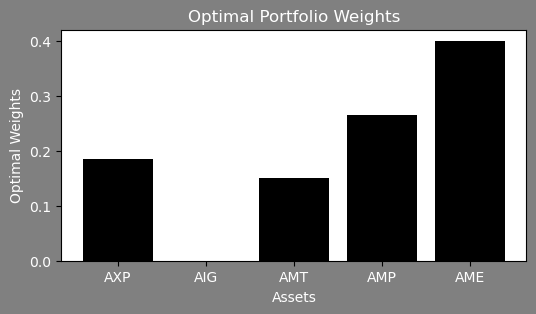

In [75]:
# Visualizing  Our Result

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3), facecolor='grey')  # Set background color to grey
plt.bar(tickers, optimal_weights, color='black')  # Change color of bars to black

plt.xlabel('Assets', color='white')  # Set x-axis label color to white
plt.ylabel('Optimal Weights', color='white')  # Set y-axis label color to white
plt.title('Optimal Portfolio Weights', color='white')  # Set title color to white

plt.xticks(color='white')  # Set x-axis tick labels color to white
plt.yticks(color='white')  # Set y-axis tick labels color to white

plt.show()
